                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

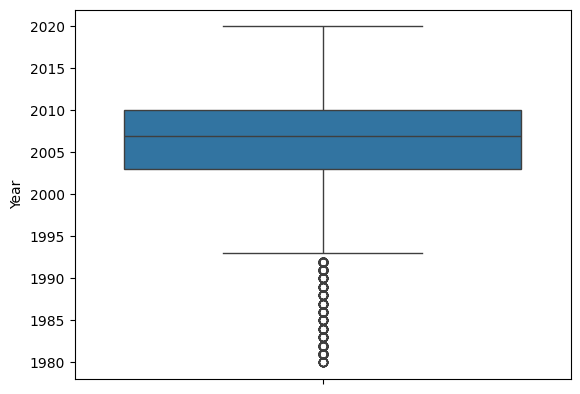

In [21]:
#importing the important stuff for data analytics
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
#32 bees

def remove_outlier_IQR(VGdf):
    Q1=VGdf.quantile(0.25)
    Q3=VGdf.quantile(0.75)
    IQR=Q3-Q1
    df_final=VGdf[~((VGdf<(Q1-1.5*IQR)) | (VGdf>(Q3+1.5*IQR)))]
    return df_final

VGdf = pd.read_csv("Video_GamesA.csv")
NFdf = pd.read_csv("netflix_titles.csv")
REdf = pd.read_csv("reviews.csv")
HSdf = pd.read_csv("hotstar.csv")



sb.boxplot(y="Year_of_Release", data=VGdf)
plt.xticks(rotation=90)
plt.ylabel("Year")

print(VGdf)

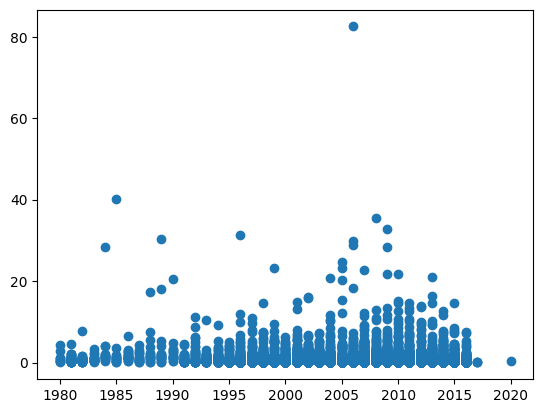

In [5]:
x = VGdf["Year_of_Release"]
y = VGdf["Global_Sales"]
plt.scatter(x, y)

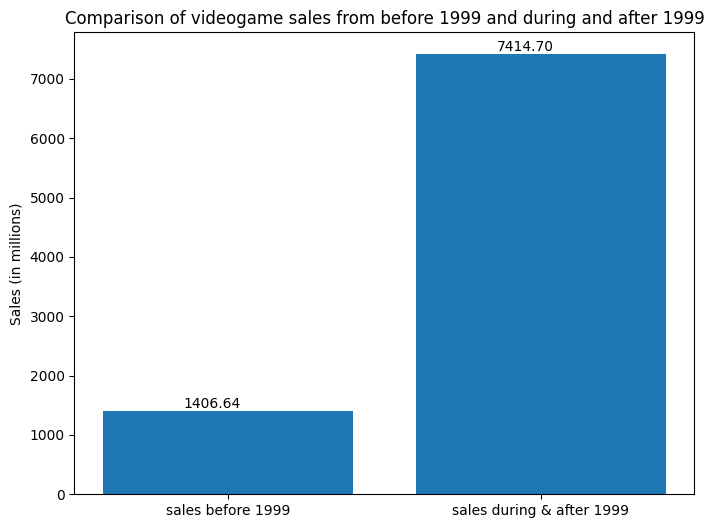

In [2]:
Early_VG = VGdf[VGdf["Year_of_Release"] < 1999]["Global_Sales"].sum()
Late_VG = VGdf[VGdf["Year_of_Release"] >= 1999]["Global_Sales"].sum()
#Early_Sales = Early_VG("Year_of_Release")["Global_Sales"].sum().values[0]
#Late_Sales = Late_VG("Year_of_Release")["Global_Sales"].sum().values[0]

plt.figure(figsize=(8, 6))
bars = plt.bar(["sales before 1999", "sales during & after 1999"], [Early_VG, Late_VG])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2 - 0.05, bar.get_height() + 0.05, f'{bar.get_height():.2f}', ha="center", va="bottom")
plt.ylabel("Sales (in millions)")
plt.title("Comparison of videogame sales from before 1999 and during and after 1999")
plt.show()

<Axes: xlabel='Year_of_Release'>

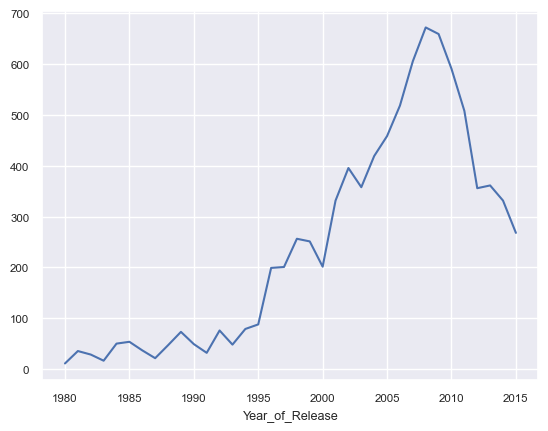

In [77]:
NoNull = VGdf.loc[VGdf["Year_of_Release"].notnull()]
NotAb = NoNull.loc[VGdf["Year_of_Release"] <= 2015]
newdf = NotAb.groupby("Year_of_Release")["Global_Sales"].sum()
newdf.plot()

<Axes: xlabel='Year_of_Release'>

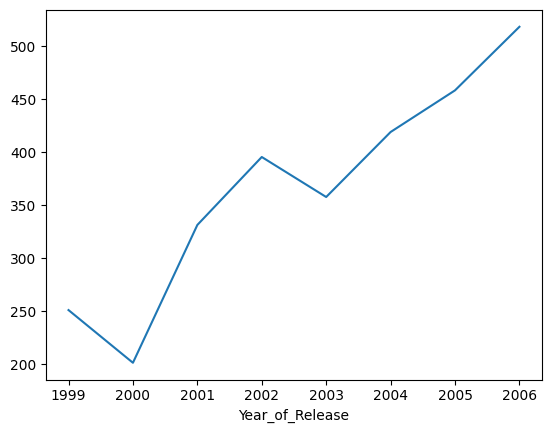

In [12]:
betYear = VGdf.loc[VGdf["Year_of_Release"].between(1999, 2006)]
newdf = betYear.groupby("Year_of_Release")["Global_Sales"].sum()
newdf.plot()

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_7252\3274919488.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=EarlYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_7252\3274919488.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  k = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MidYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_7252\3274919488.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  h = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MLYear, kind="bar", palette="muted", legend=True, ci=None)
C:\Users\FiercePC\AppData\Local\Temp\ipykernel_7252\3274919488.py:11: FutureWarning: 

The `ci` parameter is dep

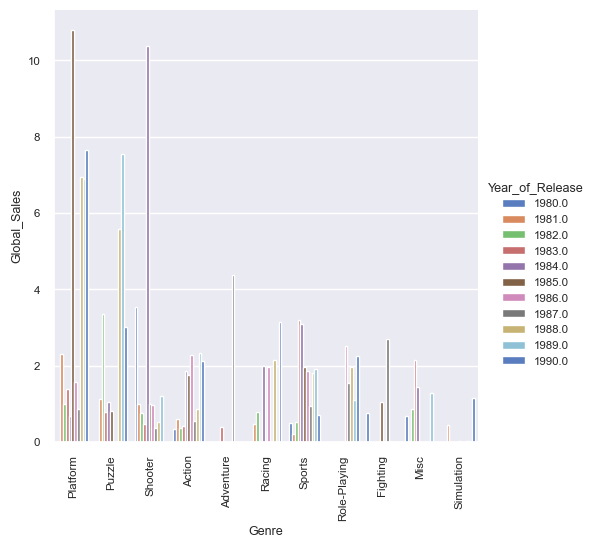

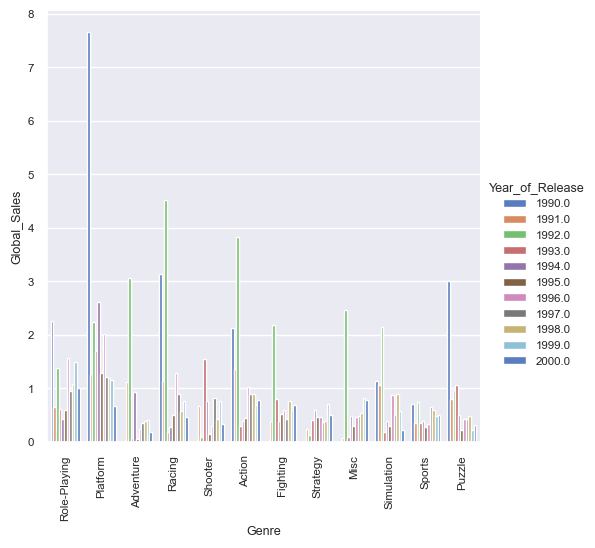

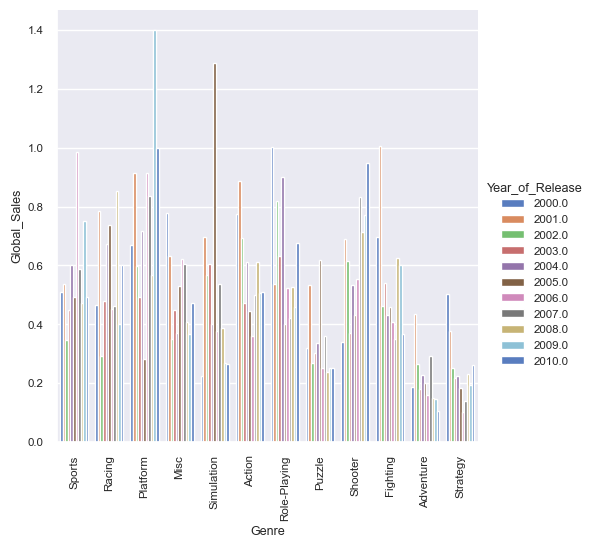

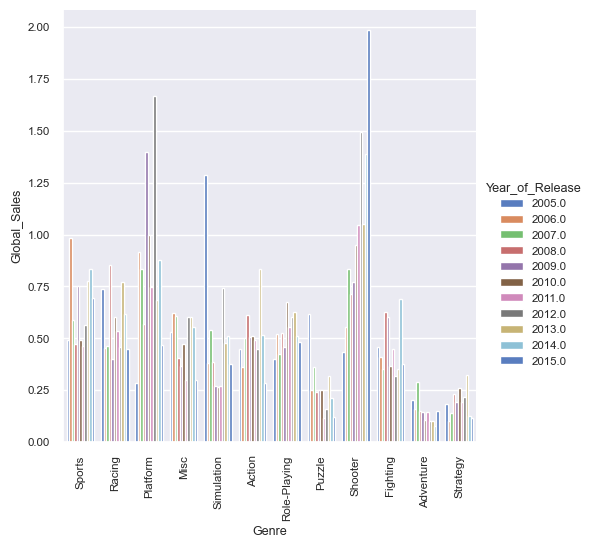

In [78]:
EarlYear = VGdf.loc[VGdf["Year_of_Release"].between(1980, 1990)]
MidYear = VGdf.loc[VGdf["Year_of_Release"].between(1990, 2000)]
MLYear  = VGdf.loc[VGdf["Year_of_Release"].between(2000, 2010)]
LateYear = VGdf.loc[VGdf["Year_of_Release"].between(2005, 2015)]
g = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=EarlYear, kind="bar", palette="muted", legend=True, ci=None)
g.tick_params(axis="x", rotation=90)
k = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MidYear, kind="bar", palette="muted", legend=True, ci=None)
k.tick_params(axis="x", rotation=90)
h = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=MLYear, kind="bar", palette="muted", legend=True, ci=None)
h.tick_params(axis="x", rotation=90)
I = sb.catplot(x="Genre", y="Global_Sales", hue="Year_of_Release", data=LateYear, kind="bar", palette="muted", legend=True, ci=None)
I.tick_params(axis="x", rotation=90)

plt.show()

           Genre  count
0         Action   2396
1           Misc   1336
2         Sports   1335
3   Role-Playing   1013
4      Adventure   1009
5        Shooter    786
6     Simulation    626
7         Racing    614
8       Fighting    440
9       Strategy    409
10      Platform    408
11        Puzzle    398


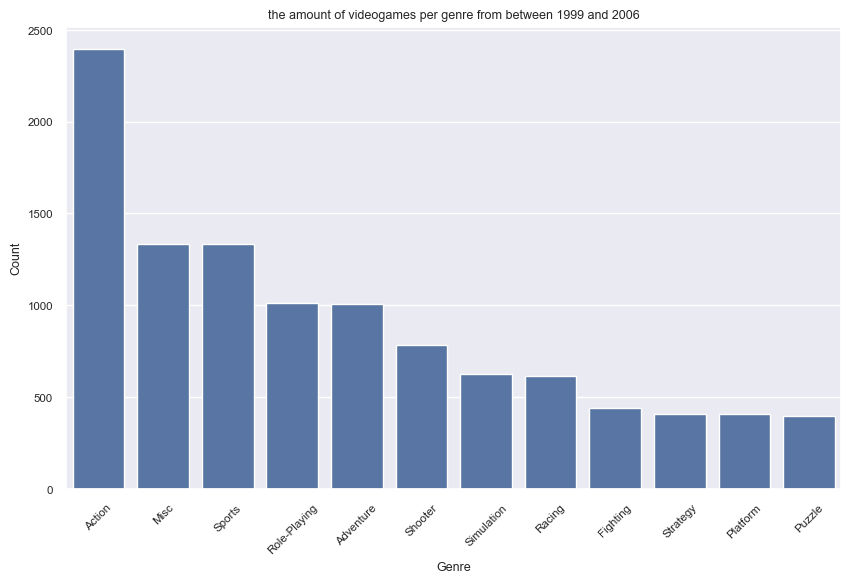

In [29]:
#egg = NFdf.loc[NFdf["release_year"].notnull()]
#newdf = egg.groupby("type")["release_year"].sum()
#I = sb.catplot(x="type", y=egg.value_counts, data=egg, kind="bar")
#I.tick_params(axis="x", rotation=90)
#newdf.plot()
#betYear = VGdf.loc[VGdf["Year_of_Release"].between(1999, 2006)]
GY = VGdf.loc[VGdf["Year_of_Release"].between(2005, 2015)]
GC = GY["Genre"].value_counts().reset_index()

GC.columns = ["Genre", "count"]
print(GC)

plt.figure(figsize=(10,6))
sb.barplot(data=GC, x="Genre", y="count")

plt.title("the amount of videogames per genre from between 2005 and 2015")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

           Genre  count
0         Action   3370
1         Sports   2348
2           Misc   1750
3   Role-Playing   1500
4        Shooter   1323
5      Adventure   1303
6         Racing   1249
7       Platform    888
8     Simulation    874
9       Fighting    849
10      Strategy    683
11        Puzzle    580


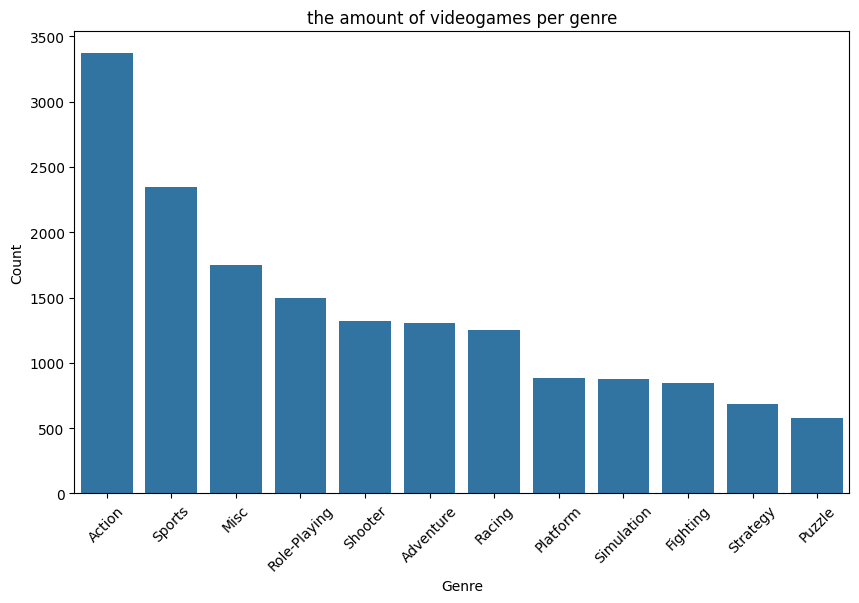

In [22]:
GC = VGdf["Genre"].value_counts().reset_index()

GC.columns = ["Genre", "count"]
print(GC)

plt.figure(figsize=(10,6))
sb.barplot(data=GC, x="Genre", y="count")

plt.title("the amount of videogames per genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

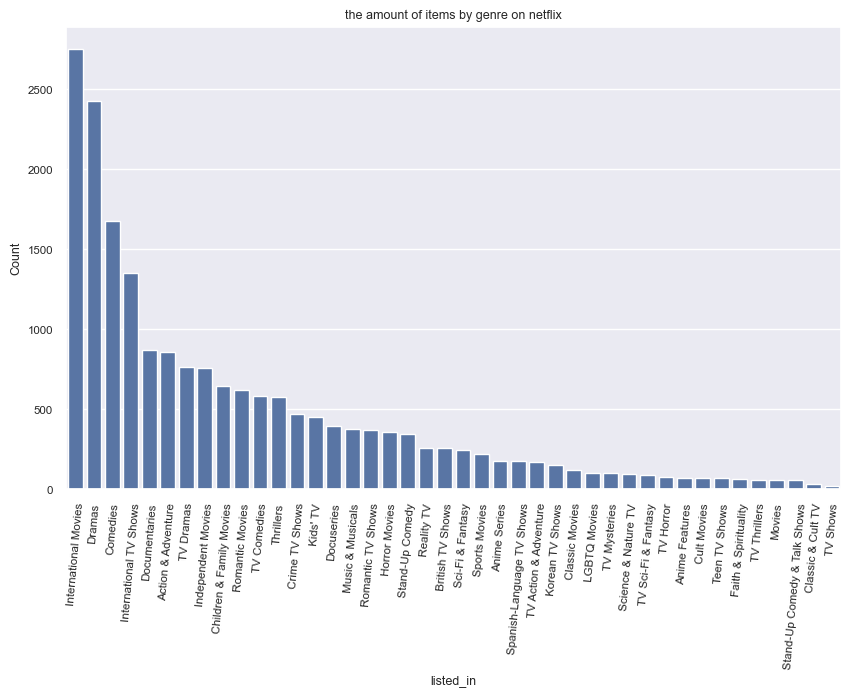

In [30]:
sb.set(font_scale=0.75)
test = pd.read_csv("netflix_titles.csv")
ap = test

ap["listed_in"] = ap["listed_in"].str.split(",")

ap_exploded = ap.explode("listed_in")

ap_exploded["listed_in"] = ap_exploded["listed_in"].str.strip()

ap_count = ap_exploded["listed_in"].value_counts().reset_index()

GC = NFdf["listed_in"].value_counts().reset_index()

ap_count.columns = ["listed_in", "count"]
#print(ap_count)

plt.figure(figsize=(10,6))
sb.barplot(data=ap_count, x="listed_in", y="count" )

plt.title("the amount of items by genre on netflix")
plt.xlabel("listed_in")
plt.ylabel("Count")
plt.xticks(rotation= 85)
plt.show()

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_12140\1972971339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap["listed_in"] = ap["listed_in"].str.split(",")


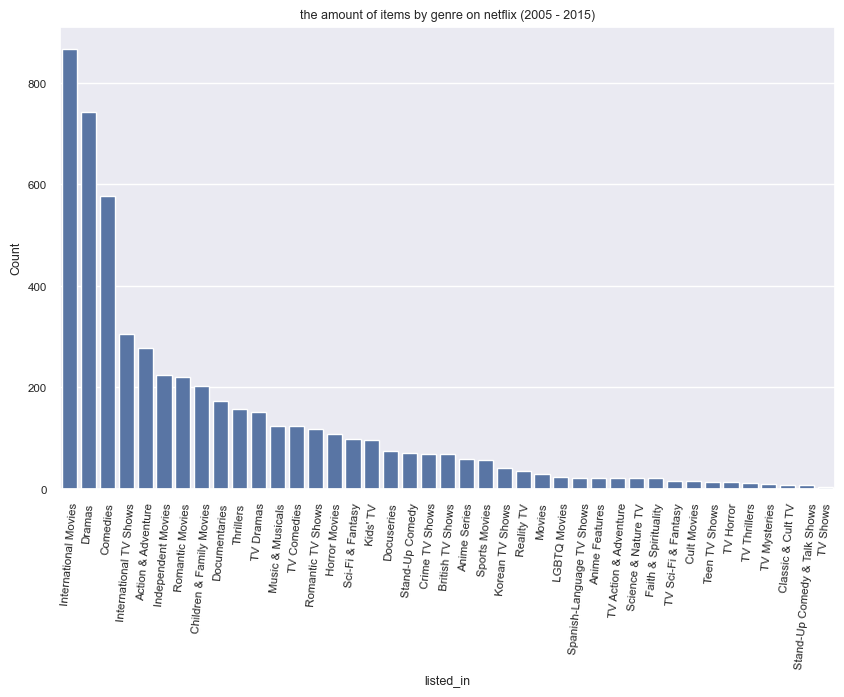

In [31]:
sb.set(font_scale=0.75)
test = pd.read_csv("netflix_titles.csv")
ap = test.loc[NFdf["release_year"].between(2005, 2015)]

ap["listed_in"] = ap["listed_in"].str.split(",")

ap_exploded = ap.explode("listed_in")

ap_exploded["listed_in"] = ap_exploded["listed_in"].str.strip()

ap_count = ap_exploded["listed_in"].value_counts().reset_index()

GC = NFdf["listed_in"].value_counts().reset_index()

ap_count.columns = ["listed_in", "count"]
#print(ap_count)

plt.figure(figsize=(10,6))
sb.barplot(data=ap_count, x="listed_in", y="count" )

plt.title("the amount of items by genre on netflix (2005 - 2015)")
plt.xlabel("listed_in")
plt.ylabel("Count")
plt.xticks(rotation= 85)
plt.show()

               genre  count
0              Drama   2043
1             Comedy    791
2            Romance    642
3             Action    619
4            Reality    401
5           Thriller    352
6             Family    263
7          Animation    240
8        Documentary    207
9              Sport    180
10  Animals & Nature    119
11            Horror    118
12              Kids    104
13             Crime     99
14         Mythology     81
15         Talk Show     73
16         Superhero     63
17    Standup Comedy     51
18         Adventure     49
19            Biopic     47
20           Mystery     42
21        Historical     42
22   Science Fiction     41
23           Science     34
24              Teen     31
25            Awards     28
26         Lifestyle     24
27              Food     20
28      Concert Film     18
29           Musical     16
30           Fantasy     11
31            Shorts     10
32            Travel      7
33         Docudrama      5
34         Formula E

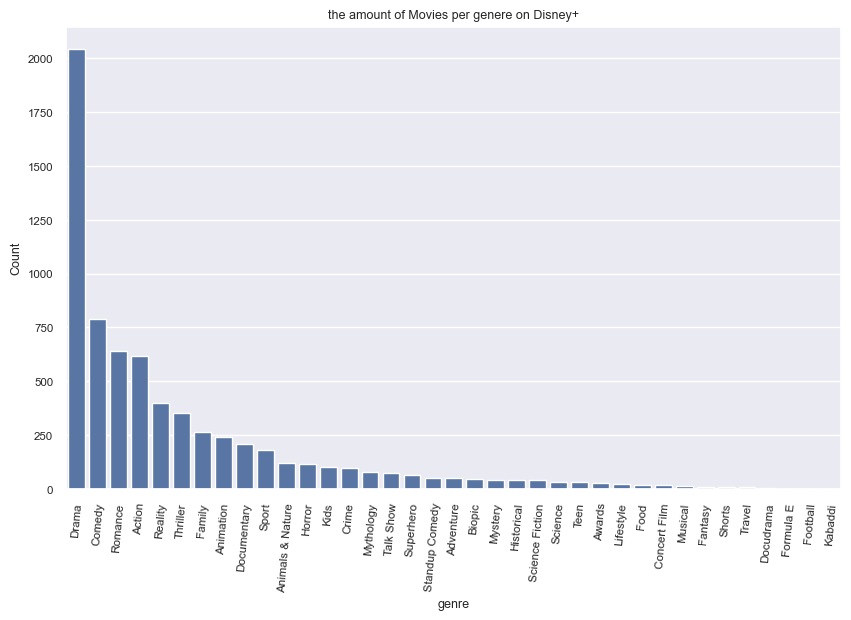

In [32]:
DC = HSdf["genre"].value_counts().reset_index()

DC.columns = ["genre", "count"]
print(DC)

plt.figure(figsize=(10,6))
sb.barplot(data=DC, x="genre", y="count")

plt.title("the amount of Movies per genere on Disney+")
plt.xlabel("genre")
plt.ylabel("Count")
plt.xticks(rotation=85)
plt.show()

               genre  count
0              Drama    551
1             Comedy    290
2            Romance    289
3             Action    283
4           Thriller    110
5          Animation    107
6             Family     64
7            Reality     58
8               Kids     43
9             Horror     39
10    Standup Comedy     28
11             Crime     26
12       Documentary     25
13         Superhero     22
14         Mythology     20
15              Teen     19
16         Talk Show     18
17         Adventure     17
18            Biopic     15
19   Science Fiction     10
20        Historical     10
21            Awards      8
22         Lifestyle      8
23  Animals & Nature      4
24           Science      4
25           Mystery      4
26         Docudrama      3
27             Sport      3
28      Concert Film      2
29           Musical      1
30          Football      1
31           Kabaddi      1
32              Food      1


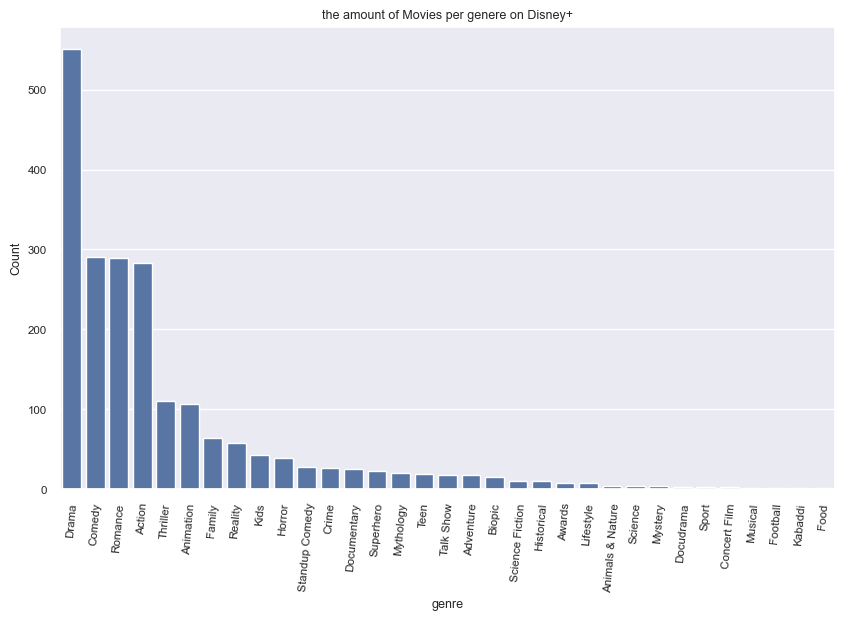

In [28]:
DY = HSdf.loc[HSdf["year"].between(2005, 2015)]
DC = DY["genre"].value_counts().reset_index()

DC.columns = ["genre", "count"]
print(DC)

plt.figure(figsize=(10,6))
sb.barplot(data=DC, x="genre", y="count")

plt.title("the amount of Movies per genere on Disney+ (2005 - 2015)")
plt.xlabel("genre")
plt.ylabel("Count")
plt.xticks(rotation=85)
plt.show()